In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [22]:
DATASET_PATH = r"C:\Users\Usuario\.cache\kagglehub\datasets\philosopher0808\real-vs-ai-generated-faces-dataset\versions\1\dataset\dataset"


In [23]:
# IMG_SIZE = 224
# BATCH_SIZE = 16
# NUM_CLASSES = 2
# EPOCHS = 30
IMG_SIZE = 64
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 2



In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)


In [25]:
train_generator = train_datagen.flow_from_directory(
    directory=f"{DATASET_PATH}/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    directory=f"{DATASET_PATH}/validate",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    directory=f"{DATASET_PATH}/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 72574 images belonging to 2 classes.
Found 24190 images belonging to 2 classes.
Found 24190 images belonging to 2 classes.


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(NUM_CLASSES, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [27]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)


In [28]:
# history = model.fit(
#     train_generator,
#     epochs=EPOCHS,
#     validation_data=val_generator,
#     verbose=1
# )
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    steps_per_epoch=6,
    validation_steps=3
)



Epoch 1/50
6/6 [==============================] - 3s 346ms/step - loss: 0.7685 - accuracy: 0.4896 - val_loss: 0.6908 - val_accuracy: 0.5417
Epoch 2/50
6/6 [==============================] - 2s 273ms/step - loss: 0.6568 - accuracy: 0.6406 - val_loss: 0.7042 - val_accuracy: 0.5521
Epoch 3/50
6/6 [==============================] - 2s 267ms/step - loss: 0.6814 - accuracy: 0.5677 - val_loss: 0.6595 - val_accuracy: 0.6458
Epoch 4/50
6/6 [==============================] - 2s 260ms/step - loss: 0.6861 - accuracy: 0.5573 - val_loss: 0.6727 - val_accuracy: 0.5833
Epoch 5/50
6/6 [==============================] - 2s 264ms/step - loss: 0.6721 - accuracy: 0.5677 - val_loss: 0.8053 - val_accuracy: 0.5729
Epoch 6/50
6/6 [==============================] - 2s 266ms/step - loss: 0.7124 - accuracy: 0.5208 - val_loss: 0.6878 - val_accuracy: 0.4688
Epoch 7/50
6/6 [==============================] - 2s 263ms/step - loss: 0.6675 - accuracy: 0.5729 - val_loss: 0.6614 - val_accuracy: 0.5729
Epoch 8/50
6/6 [====

In [29]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


756/756 [==============================] - 60s 80ms/step - loss: 0.6368 - accuracy: 0.6421
Test loss: 0.6367801427841187
Test accuracy: 0.6420835256576538


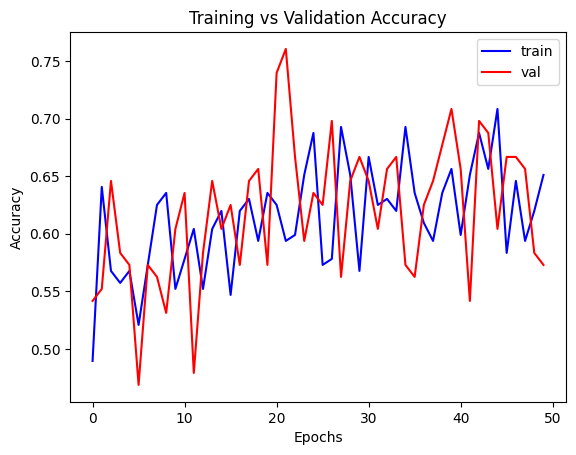

In [30]:
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'r')
plt.legend(['train', 'val'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.show()


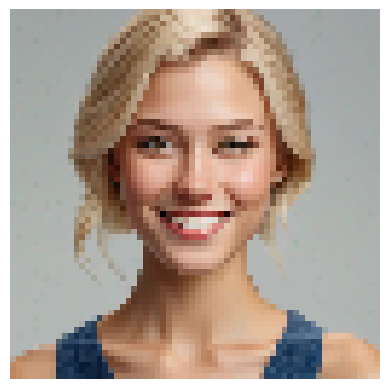

1/1 [==============================] - 0s 27ms/step
Raw prediction: [[0.49255532 0.5074447 ]]


In [38]:
from tensorflow.keras.preprocessing import image


# Ruta de la imagen nueva
img_path = r"C:\Users\Usuario\Downloads\IA1.jpg"  
 # <-- cambia esto

# Cargar imagen
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))

# Convertir a array
img_array = image.img_to_array(img)

# Normalizar (igual que entrenamiento)
img_array = img_array / 255.0

# Añadir dimensión batch
img_array = np.expand_dims(img_array, axis=0)

# Mostrar imagen
plt.imshow(img)
plt.axis("off")
plt.show()

prediction = model.predict(img_array)

print("Raw prediction:", prediction)

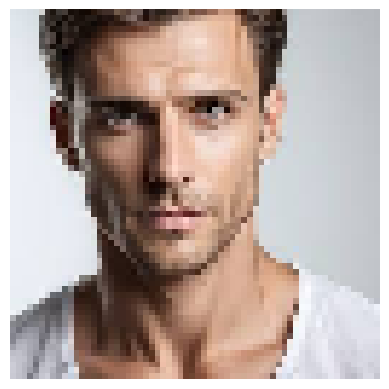

1/1 [==============================] - 0s 28ms/step
Raw prediction: [[0.6193307  0.38066933]]


In [41]:
# Ruta de la imagen nueva
img_path = r"C:\Users\Usuario\Downloads\IA2.jpg"  
 # <-- cambia esto

# Cargar imagen
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))

# Convertir a array
img_array = image.img_to_array(img)

# Normalizar (igual que entrenamiento)
img_array = img_array / 255.0

# Añadir dimensión batch
img_array = np.expand_dims(img_array, axis=0)

# Mostrar imagen
plt.imshow(img)
plt.axis("off")
plt.show()

prediction = model.predict(img_array)

print("Raw prediction:", prediction)

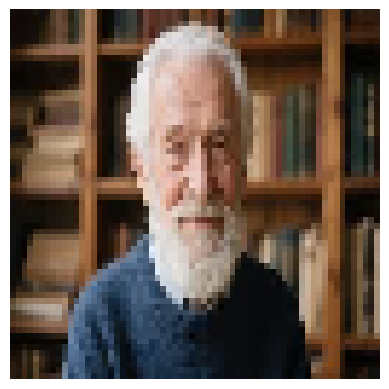

1/1 [==============================] - 0s 29ms/step
Raw prediction: [[0.81805104 0.18194897]]


In [42]:
# Ruta de la imagen nueva
img_path = r"C:\Users\Usuario\Downloads\IA3.jpg"  
 # <-- cambia esto

# Cargar imagen
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))

# Convertir a array
img_array = image.img_to_array(img)

# Normalizar (igual que entrenamiento)
img_array = img_array / 255.0

# Añadir dimensión batch
img_array = np.expand_dims(img_array, axis=0)

# Mostrar imagen
plt.imshow(img)
plt.axis("off")
plt.show()

prediction = model.predict(img_array)

print("Raw prediction:", prediction)

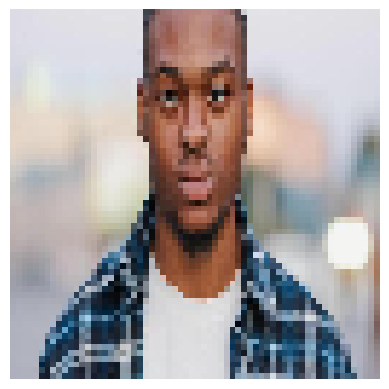

1/1 [==============================] - 0s 36ms/step
Raw prediction: [[0.7271308  0.27286923]]


In [43]:
# Ruta de la imagen nueva
img_path = r"C:\Users\Usuario\Downloads\IA4.jpg"  
 # <-- cambia esto

# Cargar imagen
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))

# Convertir a array
img_array = image.img_to_array(img)

# Normalizar (igual que entrenamiento)
img_array = img_array / 255.0

# Añadir dimensión batch
img_array = np.expand_dims(img_array, axis=0)

# Mostrar imagen
plt.imshow(img)
plt.axis("off")
plt.show()

prediction = model.predict(img_array)

print("Raw prediction:", prediction)

In [44]:
# Ruta de la imagen nueva
img_path = r"C:\Users\Usuario\Downloads\IA5.jpg"  
 # <-- cambia esto

# Cargar imagen
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))

# Convertir a array
img_array = image.img_to_array(img)

# Normalizar (igual que entrenamiento)
img_array = img_array / 255.0

# Añadir dimensión batch
img_array = np.expand_dims(img_array, axis=0)

# Mostrar imagen
plt.imshow(img)
plt.axis("off")
plt.show()

prediction = model.predict(img_array)

print("Raw prediction:", prediction)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001ED243CD940>